In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [3]:
df = pd.read_csv(r"C:\Users\ADITHYA\OneDrive\Desktop\student prediction\student-por.csv")
print(df.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [4]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [5]:
print(df.describe())


              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.0510

In [6]:
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [7]:
df['pass_fail'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)


In [8]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Encode and save
le_sex = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])
pickle.dump(le_sex, open("le_sex.pkl", "wb"))

le_school = LabelEncoder()
df['school'] = le_school.fit_transform(df['school'])
pickle.dump(le_school, open("le_school.pkl", "wb"))


In [9]:
df = pd.get_dummies(df, drop_first=True)



In [10]:
df = df.replace({True: 1, False: 0})


C:\Users\ADITHYA\AppData\Local\Temp\ipykernel_17560\2180546242.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


In [11]:
df

,school,sex,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,0,0,18,4,4,2,2,0,4,3,...,1,0,1,0,0,0,1,1,0,0
1,0,0,17,1,1,1,2,0,5,3,...,0,0,0,1,0,0,0,1,1,0
2,0,0,15,1,1,1,2,0,4,3,...,1,0,1,0,0,0,1,1,1,0
3,0,0,15,4,2,1,3,0,3,2,...,1,0,0,1,0,1,1,1,1,1
4,0,0,16,3,3,1,2,0,4,3,...,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,2,3,1,3,1,5,4,...,1,0,0,0,0,1,0,1,1,0
645,1,0,18,3,1,1,2,0,4,3,...,1,0,0,1,0,0,1,1,1,0
646,1,0,18,1,1,2,2,0,1,1,...,1,0,0,0,0,1,1,1,0,0
647,1,1,17,3,1,2,1,0,2,4,...,1,0,0,0,0,0,0,1,1,0


In [12]:
X = df.drop(['G3','pass_fail'], axis=1)
y = df['pass_fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X_train, y_train)

pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


Logistic Regression Accuracy: 0.9076923076923077
[[ 10   5]
 [  7 108]]
              precision    recall  f1-score   support

           0       0.59      0.67      0.62        15
           1       0.96      0.94      0.95       115

    accuracy                           0.91       130
   macro avg       0.77      0.80      0.79       130
weighted avg       0.91      0.91      0.91       130



In [15]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, pred))


Random Forest Accuracy: 0.9307692307692308


In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, pred))


KNN Accuracy: 0.9


In [17]:
svm = SVC()
svm.fit(X_train, y_train)

pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, pred))


SVM Accuracy: 0.9230769230769231


In [18]:
# Regression Model (Predict G3)

In [19]:
X_reg = df.drop(['G3','pass_fail'], axis=1)
y_reg = df['G3']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [20]:
scaler2 = StandardScaler()
X_train_r = scaler2.fit_transform(X_train_r)
X_test_r = scaler2.transform(X_test_r)


In [21]:
lr = LinearRegression()
lr.fit(X_train_r, y_train_r)

pred_r = lr.predict(X_test_r)

print("MSE:", mean_squared_error(y_test_r, pred_r))
print("R2 Score:", r2_score(y_test_r, pred_r))


MSE: 1.475909256363932
R2 Score: 0.8486513286537314


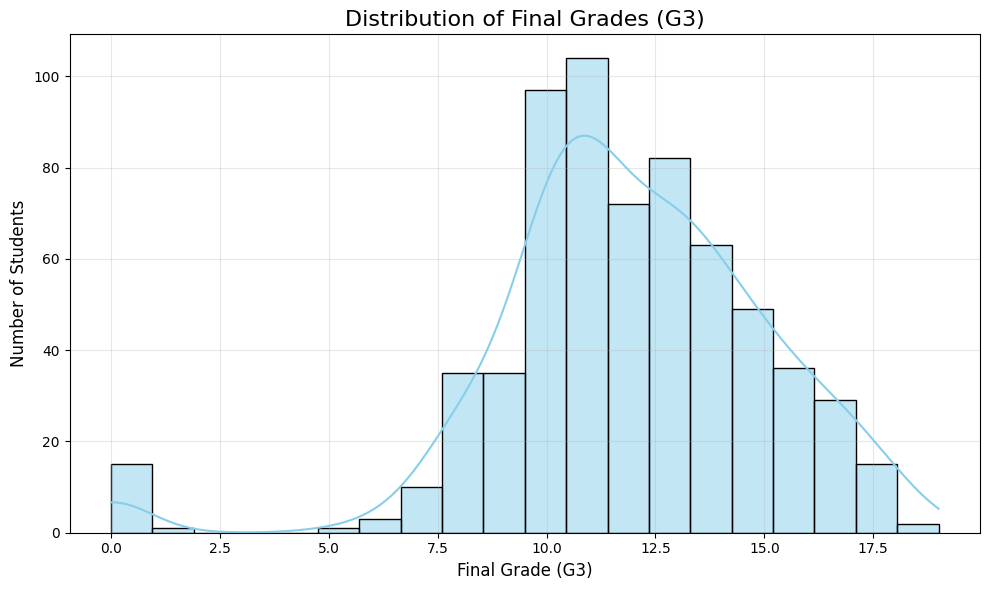

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))  # Set figure size
sns.histplot(df['G3'], kde=True, color='skyblue', bins=20)  # Histogram + KDE
plt.title("Distribution of Final Grades (G3)", fontsize=16)  # Title
plt.xlabel("Final Grade (G3)", fontsize=12)  # X-axis label
plt.ylabel("Number of Students", fontsize=12)  # Y-axis label
plt.grid(alpha=0.3)  # Light grid
plt.tight_layout()  # Fit layout
plt.savefig("G3_distribution.png", dpi=300)  # Save high-res image
plt.show()


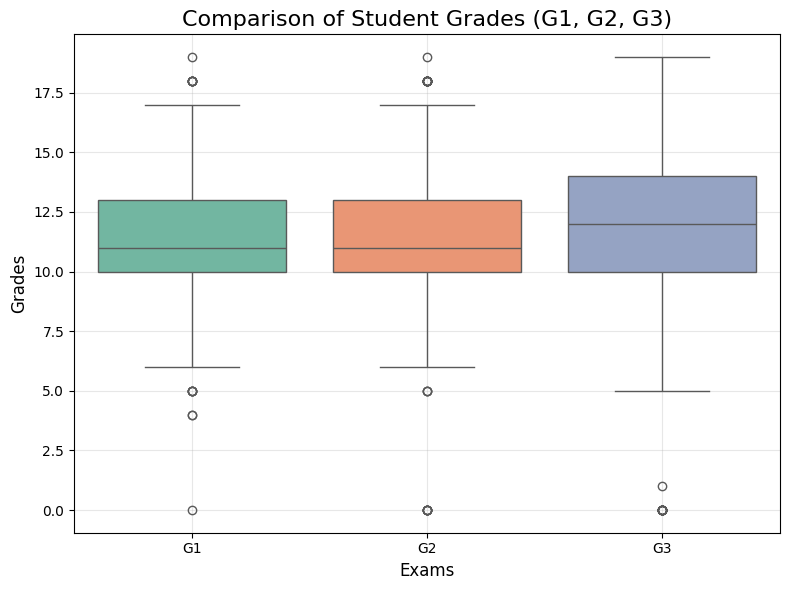

In [23]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['G1','G2','G3']], palette="Set2")  # Color palette
plt.title("Comparison of Student Grades (G1, G2, G3)", fontsize=16)
plt.xlabel("Exams", fontsize=12)
plt.ylabel("Grades", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("Grades_Boxplot.png", dpi=300)
plt.show()


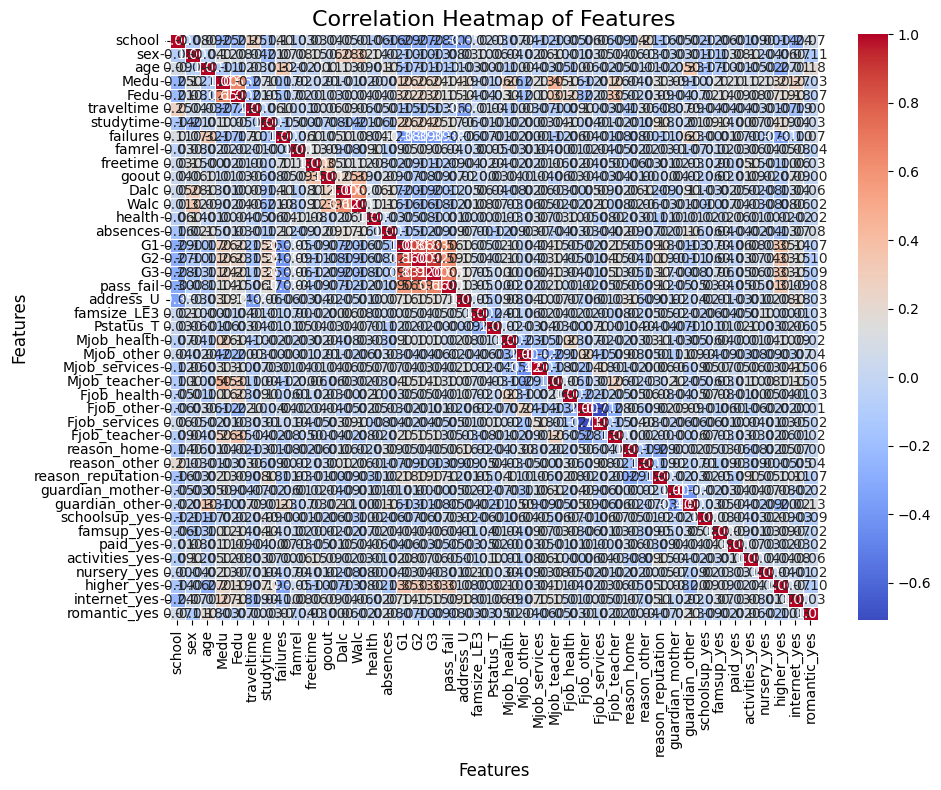

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))  # Set figure size

# Simple heatmap with annotations
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add title and axis labels
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

plt.tight_layout()  # Adjust layout
plt.savefig("Correlation_Heatmap_Simple.png", dpi=300)  # Save image
plt.show()


In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc}")

best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]

print("\nBest Model:", best_model_name)
print("Accuracy:", accuracies[best_model_name])


Logistic Regression Accuracy: 0.9076923076923077
Decision Tree Accuracy: 0.9076923076923077
Random Forest Accuracy: 0.9230769230769231
KNN Accuracy: 0.9
SVM Accuracy: 0.9230769230769231

Best Model: Random Forest
Accuracy: 0.9230769230769231


In [26]:
# TRAINING PIPELINE (Run Once)
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Load dataset
df = pd.read_csv(r"C:\Users\ADITHYA\OneDrive\Desktop\student prediction\student-por.csv")

# Target
y = df["G3"]

# Select features YOU want to use in Streamlit
X = df[["sex", "age", "Medu", "Fedu", "studytime", "failures"]]

# Define columns
num_cols = ["age", "Medu", "Fedu", "studytime", "failures"]
cat_cols = ["sex"]

# Preprocessing
preprocess = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

# Build Pipeline
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("regressor", RandomForestRegressor(n_estimators=200, random_state=42))
])

# Train
model.fit(X, y)

# Save model
pickle.dump(model, open("best_student_model.pkl", "wb"))

print("Model saved successfully!")


Model saved successfully!
